In [42]:
import keras

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

In [5]:
type(x_train)

numpy.ndarray

In [6]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

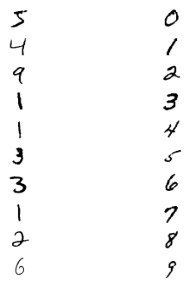

In [10]:
plt.figure(figsize=(5,5))
for k in range(20):
    plt.subplot(10,2,k+1)
    plt.imshow(x_train[k],cmap='Greys')
    plt.axis('off')
plt.show()

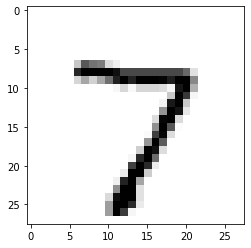

In [13]:
plt.imshow(x_valid[0],cmap='Greys')

In [14]:
x_train=x_train.reshape(60000,784).astype('float32')
x_valid=x_valid.reshape(10000,784).astype('float32')

In [15]:
x_train/=255
x_valid/=255

In [16]:
x_valid[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
import keras.utils as np_utils

In [22]:
n_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [24]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [25]:
x_valid[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model=Sequential()

In [20]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [21]:
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,batch_size=125,epochs=15,verbose=1)

Epoch 1/15
480/480 [==============================] - 1s 1ms/step - loss: 27.3076 - accuracy: 0.1096
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 27.3066 - accuracy: 0.1101
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 27.3061 - accuracy: 0.1136
Epoch 4/15
480/480 [==============================] - 1s 1ms/step - loss: 27.3058 - accuracy: 0.1180
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 27.3055 - accuracy: 0.1205
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 27.3054 - accuracy: 0.1216
Epoch 7/15
480/480 [==============================] - 1s 1ms/step - loss: 27.3052 - accuracy: 0.1238
Epoch 8/15
480/480 [==============================] - 1s 1ms/step - loss: 27.3051 - accuracy: 0.1255
Epoch 9/15
480/480 [==============================] - 1s 1ms/step - loss: 27.3050 - accuracy: 0.1265
Epoch 10/15
480/480 [==============================] - 1s 1ms/step - loss: 27.3049 - accura

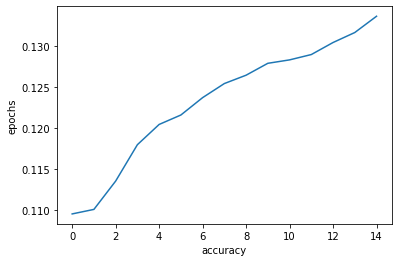

In [26]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.show()